# Context and Defining Problem Statement

The data we have at hand is of passengers and their feedback regarding their flight experience. 

Each row is one passenger. Apart from the  feedback from the customers accross various attributes(15 in total) like food, online_support, cleanliness etc, we have data about the customers' age, loyalty to the airline, gender and class.

The target column is a binary variable which tells us if the customer is satisfied or neutral/dissatisfied

The task at hand is to analyze the data and build a model to predict customer satisfaction using all or some of the data we have.

# Steps - 
- Data loading and preprocessing
- Exploratory Data Analysis
- Model building and evaluation
- Model Tuning
- Implementing the process through Pipeline

# Data loading and preprocessing

### 1. Import Pandas, Numpy, pyplot and seaborn

In [6]:
#Import necessary libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")  # Not always recommended, but jsut so our notebook looks clean for this activity

### 2. Import the dataframes that are needed
- Import "Flight data_Train.csv" and "Surveydata_Train.csv"

In [7]:
file_location = "/FileStore/tables/Flight_data.csv"
file_type = "csv"

# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
data = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

df1 = data.select("*").toPandas()

file_location = "/FileStore/tables/Survey_data.csv"
file_type = "csv"

# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
data = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

df2 = data.select("*").toPandas()

NameError: name 'spark' is not defined

### 3. Join the two dataframes using the 'id' column as the primary key
- Rename the Id column of one dataframe so that there "id" column name becomes same

In [3]:
#Using pandas' Join method
#c = a.join(b)  # Joining two dfs on the 'Id' column

df = df2.set_index("Id").join(df1.set_index("ID"))


print(df.shape)
df.head()  # the combined dataframe

NameError: name 'df2' is not defined

In [4]:
df[df['ArrivalDelayin_Mins']=='NA']

NameError: name 'df' is not defined

In [5]:
df=df[df['ArrivalDelayin_Mins']!='NA']

NameError: name 'df' is not defined

### 4. Print the number of missing values in each of the columns

In [0]:
df.isna().sum() # Since True is 1 and False is 0, if you do a sum of a boolean dataframe, we get the number of trues in each col

Out[10]: Satisfaction 0
Seat_comfort 0
Departure.Arrival.time_convenient 8210
Food_drink 8154
Gate_location 0
Inflightwifi_service 0
Inflight_entertainment 0
Online_support 0
Ease_of_Onlinebooking 0
Onboard_service 7157
Leg_room_service 0
Baggage_handling 0
Checkin_service 0
Cleanliness 0
Online_boarding 0
Gender 0
CustomerType 9073
Age 0
TypeTravel 9065
Class 0
Flight_Distance 0
DepartureDelayin_Mins 0
ArrivalDelayin_Mins 0
dtype: int64

In [0]:
# you can also find it using the snippet below
df.isnull().apply(pd.value_counts)  

Out[11]:

,Satisfaction,Seat_comfort,Departure.Arrival.time_convenient,Food_drink,Gate_location,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Class,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins
False,90633.0,90633.0,82423,82479,90633.0,90633.0,90633.0,90633.0,90633.0,83476,90633.0,90633.0,90633.0,90633.0,90633.0,90633.0,81560,90633.0,81568,90633.0,90633.0,90633.0,90633.0
True,NaN,NaN,8210,8154,NaN,NaN,NaN,NaN,NaN,7157,NaN,NaN,NaN,NaN,NaN,NaN,9073,NaN,9065,NaN,NaN,NaN,NaN


### 5. Drop all the rows having atleast one missing values and check the shape of the dataframe before and after dropping the rows
- Fill null values in ArrivalDelayin_Mins with mean
- After that drop all the rows with null values

In [0]:
df.describe().T

Out[12]:

,count,mean,std,min,25%,50%,75%,max
Age,90633.0,39.445897,15.128429,7.0,27.0,40.0,51.0,85.0
Flight_Distance,90633.0,1981.277062,1026.463419,50.0,1360.0,1926.0,2542.0,6950.0
DepartureDelayin_Mins,90633.0,14.613331,38.527675,0.0,0.0,0.0,12.0,1592.0


In [0]:
# Rest other missing values are filled with not_captured.
#It can be done in other way also or also can be dropped according to the problem and business context.
df.dropna(inplace = True) 

In [0]:
print(df.shape)

(53634, 23)

# Exploratory Data Analysis

### 6. Print correlation

In [0]:
cor = df.corr() # It will show correlation of only numerical variables here. RFE#  Principal component Analysis

In [0]:
cor

Out[7]:

,Age,Flight_Distance,DepartureDelayin_Mins
Age,1.000000,-0.250635,-0.010161
Flight_Distance,-0.250635,1.000000,0.110232
DepartureDelayin_Mins,-0.010161,0.110232,1.000000


In [0]:
#to_drop = ['DepartureDelayin_Mins']

### Feedback columns
Seat_comfort', 'Departure.Arrival.time_convenient', 'Food_drink', 'Gate_location',
'Inflightwifi_service', 'Inflight_entertainment', 'Online_support',
'Ease_of_Onlinebooking', 'Onboard_service', 'Leg_room_service',
'Baggage_handling', 'Checkin_service', 'Cleanliness', 'Online_boarding'

### 7. Manually encode these variables(printed above) such that they follow an order based on the meaning.

In [0]:
# Manual label encoding
df.replace({'extremely poor' : 0, 'poor' : 1, 'need improvement' : 2, 'acceptable' : 3, 
            'good' : 4, 'excellent' : 5}, inplace = True)  

df.replace({'very inconvinient' : 0, 'Inconvinient' : 1, 'need improvement' : 2, 'manageable' : 3,
            'Convinient' : 4, 'very convinient' : 5}, inplace = True)

In [0]:
# check for encodings
df['Departure.Arrival.time_convenient'].value_counts()

Out[19]: 4 12131
5 11080
3 9625
2 9523
1 8541
0 2734
Name: Departure.Arrival.time_convenient, dtype: int64

### 8. Display countplot of every feedback attribute with respect to Customer Satisfaction. 

You can use sns.countplot and set hue  = 'Satisfaction'

Out[20]:

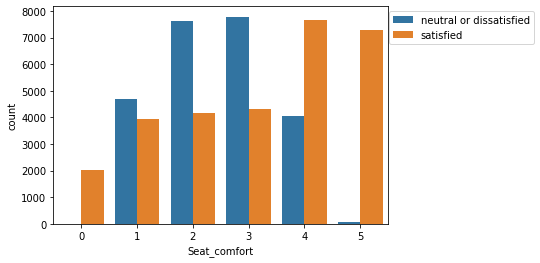

<matplotlib.legend.Legend at 0x7f82c72fac90>

In [0]:
# We can use seaborn's countplot to plot a stacked baatchart
sns.countplot(df.Seat_comfort, hue = df.Satisfaction) 
plt.legend(loc = 'upper right', bbox_to_anchor=(1.45, 1))   # to place the legend in a 'good' position



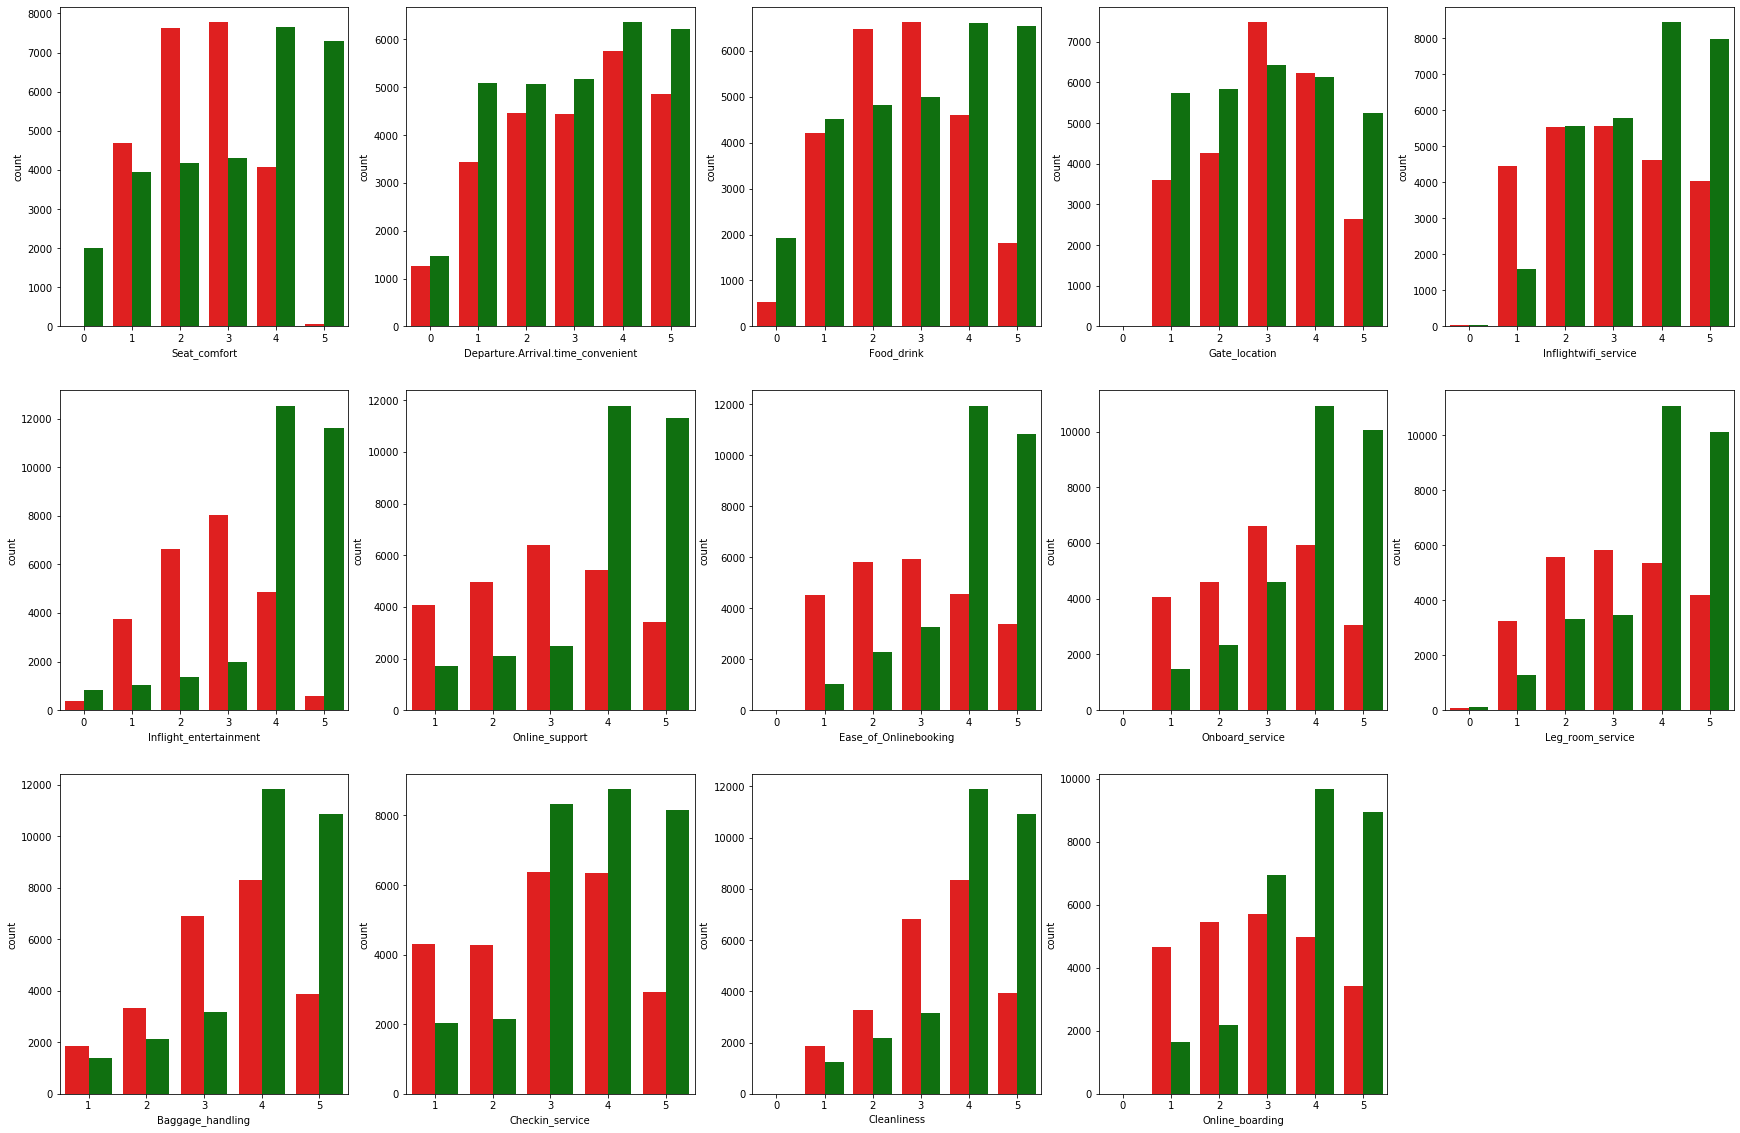

In [0]:
# Since there are a lot of columns that we want to plot, we can put all of them in one plot by using subplot()
# Additionally, since there are a lot of subplots that need to be plotted, we can use a for loop

plt.figure(figsize= (30,20))  # setting the figure size
pos = 1  # we will use this variable to index each of the plots
feedback = [ 'Seat_comfort', 'Departure.Arrival.time_convenient', 'Food_drink',
           'Gate_location', 'Inflightwifi_service','Inflight_entertainment',
           'Online_support', 'Ease_of_Onlinebooking', 'Onboard_service',
           'Leg_room_service', 'Baggage_handling','Checkin_service', 'Cleanliness', 'Online_boarding']

for i in feedback:
    plt.subplot(3, 5, pos)
    sns.countplot(df[i], hue = df.Satisfaction,
                  palette = {'satisfied':'green','neutral or dissatisfied': 'red'})
    plt.legend().remove()  # Remove legend to make the entire plot look 'good'
    pos += 1  # to plot over the grid one by one   

# Alternate way
# Using sns.barplot()

plt.figure(figsize= (30,20))  
pos = 1  

for i in feedback:
    ct = pd.crosstab(df[i], df.Satisfaction)  # Crosstab 
    stacked =ct.stack().reset_index().rename(columns={0:'value'}) #dataframe with name and count accross satisfaction levels
    plt.subplot(3, 5, pos)
    sns.barplot(x=stacked[i], y=stacked.value, hue=stacked.Satisfaction,
               palette = {'satisfied':'lightgreen','neutral or dissatisfied': 'coral'}) # Barplot
    plt.legend().remove()  # Remove legend to make the entire plot look 'good'
    pos += 1  # to plot over the grid one by one

### 9. Draw all the insights that you can from the plots

**Green and orange bars are counts of satisfied and dissatisfied customers respectively. We want to look for areas where there is a visually significant difference between the length of the stacked bars**

- From the plots above,
    - Seating comfort can cause high levels of satisfaction to customers. Hardly any people who rated highly for seat_comfort were dissatisfied
    - A similar case with respect to inflight_entertainment. In this case, having less entertainment seems to have caused far more dissatisfaction compared to bad seating.
    - Difference is observed in ease_of_online_booking quiet evidently

### 10. Print the average feedback score
- When Satisfaction columns equals 'satisfied'
- When Satisfaction columns is not equal to 'satisfied'

In [0]:
Feedback_cols = ['Seat_comfort', 'Departure.Arrival.time_convenient',
                 'Food_drink', 'Gate_location', 'Inflightwifi_service',
                 'Inflight_entertainment', 'Online_support', 'Ease_of_Onlinebooking', 
                 'Onboard_service', 'Leg_room_service', 'Baggage_handling', 'Checkin_service',
                 'Cleanliness', 'Online_boarding']

In [0]:
df.groupby('Satisfaction').mean() # Average rating of individual feedback attributes across satisfaction levels


Out[23]:

,Seat_comfort,Departure.Arrival.time_convenient,Food_drink,Gate_location,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Age,Flight_Distance,DepartureDelayin_Mins
Satisfaction,,,,,,,,,,,,,,,,,
neutral or dissatisfied,2.469331,3.015551,2.659861,3.000454,2.922988,2.618488,2.964361,2.854886,2.971868,3.061131,3.369756,2.971456,3.380275,2.875675,37.444417,2027.542755,17.91544
satisfied,3.141778,2.969617,3.000442,2.976387,3.529924,4.015821,3.983805,3.997176,3.876255,3.852846,3.972611,3.640876,3.986016,3.749787,41.015345,1944.008098,12.07601


### 11. Draw any insights that you can from the above values

- Observe the Exreme values (lower side for 'dissatisfaction' and higher side for 'satisfaction')
- Bad seats are a strong cause for customer dissatisfication
- Time convenience doesn't seem to be that big of a deal
- Dissatisfied customers had some bad experiences with food but average food seems to satisfy most people
- Gate location is totally irrelevant
- Wifi is quiet a factor. On an average, having good wifi yeilded customer satisfaction
- Easy online booking facility seems to be very important for customer satisfaction
- In flight entertainment seems to be a deal breaker

### 12. Create a new column which is the mean of 'Ease_of_Onlinebooking', 'Online_boarding', 'Online_support' and name it "avg_feedback_of_online_services". 

DIY : If online services has a bad ratings then what is the average ratings of other feedback attributes? 
And how does it impact Final Satisfaction of customers?

In [0]:
online_df = df.loc[:, ['Ease_of_Onlinebooking', 'Online_boarding', 'Online_support']]
online_df['avg_feedback_of_online_services'] = online_df.mean(axis = 1)

online_df['avg_feedback_of_online_services'].value_counts()


Out[24]: 4.000000 10865
3.000000 7081
5.000000 6496
4.333333 5441
2.000000 5318
3.666667 3793
1.000000 3690
4.666667 3463
3.333333 2559
2.666667 2122
2.333333 1878
1.666667 685
1.333333 241
0.666667 2
Name: avg_feedback_of_online_services, dtype: int64

# Model building and evaluation

### 14. Encode the columns "Gender", "CustomerType", "TypeTravel", "Class", "Satisfaction" 
- Use manual encoding or other type of encoding

In [0]:
# Number of classes in each of the categorical attributes
for i in df.columns:
    if df[i].dtype == 'O':
        print(i, '->', len(df[i].value_counts()))

Satisfaction -> 2
Gender -> 2
CustomerType -> 2
TypeTravel -> 2
Class -> 3
ArrivalDelayin_Mins -> 401

In [0]:
df.Class.value_counts()

Out[26]: Business 25647
Eco 24078
Eco Plus 3909
Name: Class, dtype: int64

In [0]:
#Manuanl Encoding
df.replace({'Loyal Customer' : 1, 'disloyal Customer' : 0,
               'Business travel' : 1, 'Personal Travel' : 0,
              'Female' : 0, 'Male' : 1,
               'satisfied' : 1, 'neutral or dissatisfied' : 0, 'Eco Plus': 0 , 'Eco': 1, 'Business': 2}, inplace = True)
               

In [0]:
df['ArrivalDelayin_Mins'] = df['ArrivalDelayin_Mins'].astype(int)

In [0]:
#onehotencoding
df_coded = pd.get_dummies(df)

In [0]:
df_coded

Out[30]:

,Satisfaction,Seat_comfort,Departure.Arrival.time_convenient,Food_drink,Gate_location,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Class,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins
Id,,,,,,,,,,,,,,,,,,,,,,,
198671,0,1,3,3,3,1,2,1,1,3,3,1,2,2,1,1,1,30,1,2,1354,11,8
191830,1,4,4,4,3,1,4,1,1,1,4,1,3,3,1,1,0,24,1,1,2291,0,0
228137,1,5,5,5,5,3,5,5,4,4,5,4,3,4,3,1,1,47,1,2,657,0,0
240081,1,1,1,1,1,5,5,5,4,2,4,4,5,3,5,0,1,30,1,2,5342,140,125
233692,1,1,1,1,1,2,5,5,5,5,5,5,5,5,3,1,1,58,1,2,351,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240287,1,5,5,5,5,5,4,5,5,5,5,5,3,5,4,1,1,78,1,2,2741,0,0
177814,1,5,5,5,3,3,5,4,4,4,5,2,5,4,3,0,1,67,0,1,306,2,0
181405,0,2,0,2,4,3,2,3,3,4,2,5,5,4,3,0,0,25,1,2,2070,0,0


In [0]:
df_coded.columns

Out[31]: Index(['Satisfaction', 'Seat_comfort', 'Departure.Arrival.time_convenient',
 'Food_drink', 'Gate_location', 'Inflightwifi_service',
 'Inflight_entertainment', 'Online_support', 'Ease_of_Onlinebooking',
 'Onboard_service', 'Leg_room_service', 'Baggage_handling',
 'Checkin_service', 'Cleanliness', 'Online_boarding', 'Gender',
 'CustomerType', 'Age', 'TypeTravel', 'Class', 'Flight_Distance',
 'DepartureDelayin_Mins', 'ArrivalDelayin_Mins'],
 dtype='object')

In [0]:
df_coded.head()

Out[32]:

,Satisfaction,Seat_comfort,Departure.Arrival.time_convenient,Food_drink,Gate_location,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Class,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins
Id,,,,,,,,,,,,,,,,,,,,,,,
198671,0,1,3,3,3,1,2,1,1,3,3,1,2,2,1,1,1,30,1,2,1354,11,8
191830,1,4,4,4,3,1,4,1,1,1,4,1,3,3,1,1,0,24,1,1,2291,0,0
228137,1,5,5,5,5,3,5,5,4,4,5,4,3,4,3,1,1,47,1,2,657,0,0
240081,1,1,1,1,1,5,5,5,4,2,4,4,5,3,5,0,1,30,1,2,5342,140,125
233692,1,1,1,1,1,2,5,5,5,5,5,5,5,5,3,1,1,58,1,2,351,0,0


In [0]:
df.describe().T


Out[33]:

,count,mean,std,min,25%,50%,75%,max
Satisfaction,53634.0,0.547992,0.497696,0.0,0.0,1.0,1.0,1.0
Seat_comfort,53634.0,2.837827,1.394414,0.0,2.0,3.0,4.0,5.0
Departure.Arrival.time_convenient,53634.0,2.990379,1.525054,0.0,2.0,3.0,4.0,5.0
Food_drink,53634.0,2.846497,1.443142,0.0,2.0,3.0,4.0,5.0
Gate_location,53634.0,2.987266,1.305900,0.0,2.0,3.0,4.0,5.0
Inflightwifi_service,53634.0,3.255584,1.320158,0.0,2.0,3.0,4.0,5.0
Inflight_entertainment,53634.0,3.384215,1.340779,0.0,2.0,4.0,4.0,5.0
Online_support,53634.0,3.523008,1.307240,1.0,3.0,4.0,5.0,5.0
Ease_of_Onlinebooking,53634.0,3.480852,1.305118,0.0,2.0,4.0,5.0,5.0
Onboard_service,53634.0,3.467465,1.270331,0.0,3.0,4.0,4.0,5.0


# Scaling

#MinMax Scaling - scales the data set such that all feature values are in the range [0, 1].
#StandardScaler - removes the mean and scales the data to unit variance


You can learn about other scalers here -
https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html

In [0]:
df_coded.columns

Out[34]: Index(['Satisfaction', 'Seat_comfort', 'Departure.Arrival.time_convenient',
 'Food_drink', 'Gate_location', 'Inflightwifi_service',
 'Inflight_entertainment', 'Online_support', 'Ease_of_Onlinebooking',
 'Onboard_service', 'Leg_room_service', 'Baggage_handling',
 'Checkin_service', 'Cleanliness', 'Online_boarding', 'Gender',
 'CustomerType', 'Age', 'TypeTravel', 'Class', 'Flight_Distance',
 'DepartureDelayin_Mins', 'ArrivalDelayin_Mins'],
 dtype='object')

In [0]:
df_coded['ArrivalDelayin_Mins']

Out[35]: Id
198671 8
191830 0
228137 0
240081 125
233692 0
 ... 
240287 0
177814 0
181405 0
224128 0
186039 53
Name: ArrivalDelayin_Mins, Length: 53634, dtype: int64

In [0]:
#Here we are going to use StandardScaler to scale our data.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#What all columns to scale? I have preferred all columns except onehotencoded columns and target columns as
#scaling of target feature will not change anything as they already have values like 0 and 1 only.
#You may only scale numerical features and leave categorical features as required according to business problem need and results.
cols_to_scale = ['Seat_comfort', 'Departure.Arrival.time_convenient',
       'Food_drink', 'Gate_location', 'Inflightwifi_service',
       'Inflight_entertainment', 'Online_support', 'Ease_of_Onlinebooking',
       'Onboard_service', 'Leg_room_service', 'Baggage_handling',
       'Checkin_service', 'Cleanliness', 'Online_boarding',
       'Age', 'Flight_Distance','DepartureDelayin_Mins', 'ArrivalDelayin_Mins']

df_coded[cols_to_scale] = scaler.fit_transform(df_coded[cols_to_scale].to_numpy())

In [0]:
df_coded.describe()

Out[37]:

,Satisfaction,Seat_comfort,Departure.Arrival.time_convenient,Food_drink,Gate_location,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Class,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins
count,53634.000000,5.363400e+04,5.363400e+04,5.363400e+04,5.363400e+04,5.363400e+04,5.363400e+04,5.363400e+04,5.363400e+04,5.363400e+04,5.363400e+04,5.363400e+04,5.363400e+04,5.363400e+04,5.363400e+04,53634.000000,53634.000000,5.363400e+04,53634.000000,53634.000000,5.363400e+04,5.363400e+04,5.363400e+04
mean,0.547992,1.677196e-16,-1.090310e-16,1.499673e-16,5.166716e-18,-2.503870e-17,-9.512057e-17,-7.511611e-17,5.948348e-17,-1.269820e-16,-8.876154e-17,-2.043834e-16,-1.438069e-16,-9.657785e-17,-1.034668e-16,0.489689,0.818380,-1.793778e-16,0.689525,1.405303,1.171122e-16,1.324799e-17,-1.603007e-17
std,0.497696,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,0.499898,0.385535,1.000009e+00,0.462692,0.621937,1.000009e+00,1.000009e+00,1.000009e+00
min,0.000000,-2.035159e+00,-1.960854e+00,-1.972449e+00,-2.287537e+00,-2.466080e+00,-2.524089e+00,-1.930045e+00,-2.667103e+00,-2.729602e+00,-2.708216e+00,-2.342587e+00,-1.856806e+00,-3.239496e+00,-2.584427e+00,0.000000,0.000000,-2.147912e+00,0.000000,0.000000,-1.879917e+00,-3.802260e-01,-3.865853e-01
25%,0.000000,-6.008509e-01,-6.494122e-01,-5.865706e-01,-7.560113e-01,-9.510954e-01,-1.032406e+00,-4.000894e-01,-1.134660e+00,-3.679900e-01,-1.158443e+00,-6.074118e-01,-2.686337e-01,-6.215212e-01,-1.043639e+00,0.000000,1.000000,-8.220918e-01,0.000000,1.000000,-6.050778e-01,-3.802260e-01,-3.865853e-01
50%,1.000000,1.163032e-01,6.308534e-03,1.063685e-01,9.751576e-03,-1.936030e-01,4.592780e-01,3.648885e-01,3.977826e-01,4.192139e-01,3.913297e-01,2.601761e-01,-2.686337e-01,2.511369e-01,4.971495e-01,0.000000,1.000000,3.969130e-02,1.000000,1.000000,-5.232331e-02,-3.802260e-01,-3.865853e-01
75%,1.000000,8.334573e-01,6.620292e-01,7.993076e-01,7.755144e-01,5.638893e-01,4.592780e-01,1.129866e+00,1.164004e+00,4.192139e-01,1.166216e+00,1.127764e+00,5.254524e-01,1.123795e+00,4.971495e-01,1.000000,1.000000,7.688924e-01,1.000000,2.000000,5.432502e-01,-7.016393e-02,-5.474918e-02
max,1.000000,1.550611e+00,1.317750e+00,1.492247e+00,1.541277e+00,1.321382e+00,1.205120e+00,1.129866e+00,1.164004e+00,1.206418e+00,1.166216e+00,1.127764e+00,1.319538e+00,1.123795e+00,1.267544e+00,1.000000,1.000000,3.022787e+00,1.000000,2.000000,4.834883e+00,2.876561e+01,2.807474e+01


In [0]:
df_coded.head()

Out[38]:

,Satisfaction,Seat_comfort,Departure.Arrival.time_convenient,Food_drink,Gate_location,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Class,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins
Id,,,,,,,,,,,,,,,,,,,,,,,
198671,0,-1.318005,0.006309,0.106368,0.009752,-1.708588,-1.032406,-1.930045,-1.900882,-0.367990,-0.383557,-2.342587,-1.062720,-1.494179,-1.814033,1,1,-0.623219,1,2,-0.610917,-0.096002,-0.182378
191830,1,0.833457,0.662029,0.799308,0.009752,-1.708588,0.459278,-1.930045,-1.900882,-1.942398,0.391330,-2.342587,-0.268634,-0.621521,-1.814033,1,0,-1.020965,1,1,0.300934,-0.380226,-0.386585
228137,1,1.550611,1.317750,1.492247,1.541277,-0.193603,1.205120,1.129866,0.397783,0.419214,1.166216,0.260176,-0.268634,0.251137,-0.273245,1,1,0.503728,1,2,-1.289209,-0.380226,-0.386585
240081,1,-1.318005,-1.305133,-1.279510,-1.521774,1.321382,1.205120,1.129866,0.397783,-1.155194,0.391330,0.260176,1.319538,-0.621521,1.267544,0,1,-0.623219,1,2,3.270043,3.237165,2.804146
233692,1,-1.318005,-1.305133,-1.279510,-1.521774,-0.951095,1.205120,1.129866,1.164004,1.206418,1.166216,1.127764,1.319538,1.123795,-0.273245,1,1,1.232929,1,2,-1.586996,-0.380226,-0.386585


In [0]:
df = df_coded

### 15. Seperate the column "Satisfaction" from the rest of the columns
- Create X and y

In [0]:
X = df.drop(columns= ['Satisfaction'])  # Seperating the target and the rest
#X = df.drop(columns= ['Satisfaction'])
y = df.Satisfaction

### 16. Create train and test datasets
- Use train_test_split

In [0]:
from sklearn.model_selection import train_test_split # Splitting the data for training and testing out model

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 1, stratify = y)

In [0]:
y_train.value_counts()

Out[43]: 1 22043
0 18182
Name: Satisfaction, dtype: int64

In [0]:
y_test.value_counts()

Out[44]: 1 7348
0 6061
Name: Satisfaction, dtype: int64

In [0]:
X_train.dtypes

Out[45]: Seat_comfort float64
Departure.Arrival.time_convenient float64
Food_drink float64
Gate_location float64
Inflightwifi_service float64
Inflight_entertainment float64
Online_support float64
Ease_of_Onlinebooking float64
Onboard_service float64
Leg_room_service float64
Baggage_handling float64
Checkin_service float64
Cleanliness float64
Online_boarding float64
Gender int64
CustomerType int64
Age float64
TypeTravel int64
Class int64
Flight_Distance float64
ArrivalDelayin_Mins float64
dtype: object

### 17. Print accuracy
- Print accuracy on test data using below models
- Logistic regression model trained using all the attributes
- Logistic regression model trained using only the feedback columns
- Decision tree model trained using all the attributes
- Random forest model trained using all the attributes

Logistic Regression

In [0]:
#Logistic Regression with only feedback columns
from sklearn.linear_model import LogisticRegression #importing logistic regression

lr = LogisticRegression()

lr.fit(X_train, y_train)

pred = lr.predict(X_test)  # Predictions from logistic regression
score1 = lr.score(X_test, y_test)
score1

Out[16]: 0.8367514356029533

Predicting customer satisfaction solely based on the feedback

In [0]:
feedback = ['Seat_comfort',
 'Departure.Arrival.time_convenient',
 'Food_drink',
 'Gate_location',
 'Inflightwifi_service',
 'Inflight_entertainment',
 'Online_support',
 'Ease_of_Onlinebooking',
 'Onboard_service',
 'Leg_room_service',
 'Baggage_handling',
 'Checkin_service',
 'Cleanliness',
 'Online_boarding']

In [0]:
#Logistic Regression with only feedback columns
X_train, X_test, y_train, y_test = train_test_split(X.loc[:,feedback], y, random_state = 1, stratify = y)

lr = LogisticRegression()

lr.fit(X_train, y_train)

pred = lr.predict(X_test)

score2 = lr.score(X_test, y_test)

print(f'Number of features used = {len(X_train.columns)}')
print(f'Accuracy in predicting customer satisfaction solely based on the feedback = {score2}')

Number of features used = 14
Accuracy in predicting customer satisfaction solely based on the feedback = 0.8049071519128943

Decision Tree

In [0]:
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

score3 = dt.score(X_test, y_test)
pred = dt.predict(X_test)

print(f"Decision tree acccuracy score: {score3}")

Decision tree acccuracy score: 0.9332537847714222

Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

score4 = rf.score(X_test, y_test)

print(f'Random Forest accuracy score = {score4}')

Random Forest accuracy score = 0.9528674770676412

### 18. Print feature importance
- Print feature importance of Random Forest

In [0]:
#Decision Tree 
pd.Series(dt.feature_importances_, X_train.columns ).sort_values(ascending= False)

Out[22]: Inflight_entertainment 0.383040
Seat_comfort 0.178324
Ease_of_Onlinebooking 0.069749
CustomerType 0.044152
TypeTravel 0.038245
Flight_Distance 0.030243
Gate_location 0.026084
Class 0.024860
Age 0.024360
Checkin_service 0.024026
Departure.Arrival.time_convenient 0.020813
Leg_room_service 0.017573
Cleanliness 0.014509
Baggage_handling 0.014433
Online_support 0.013815
Gender 0.013353
Online_boarding 0.012941
ArrivalDelayin_Mins 0.012687
DepartureDelayin_Mins 0.011426
Onboard_service 0.011169
Food_drink 0.008434
Inflightwifi_service 0.005767
dtype: float64

In [0]:
#RandomForest
pd.Series(rf.feature_importances_, X_train.columns).sort_values(ascending= False)
## Alternate Way
##pd.DataFrame({'Attribute': X_train.columns, 'Importance': rf.feature_importances_}) 

Out[52]: Inflight_entertainment 0.209677
Seat_comfort 0.127059
Ease_of_Onlinebooking 0.075331
Online_support 0.067763
Onboard_service 0.049782
Food_drink 0.041761
Flight_Distance 0.040996
CustomerType 0.040418
Class 0.034949
Leg_room_service 0.034589
Age 0.033690
Online_boarding 0.029859
Gender 0.028571
Cleanliness 0.028469
Checkin_service 0.025547
Baggage_handling 0.024365
Departure.Arrival.time_convenient 0.023960
TypeTravel 0.023702
Gate_location 0.020524
ArrivalDelayin_Mins 0.019960
Inflightwifi_service 0.019027
dtype: float64

# Model Tuning

### 19. Print cross validation score
- Decision tree model trained using all the attributes
- Random Forest model trained using all the attributes
- Fine tuned (using Grid Search or Random Search) Random Forest model

**Display all the scores above with their respective models in a single dataframe**

Cross Validation Score

In [0]:
from sklearn.model_selection import cross_val_score
#For Decision Tree dt
score5 = cross_val_score(dt, X, y, cv = 10).mean()
print(f'Cross validation score of Decision tree = {score5}')

Cross validation score of Decision tree = 0.9352461517540226

In [0]:
#Random Forest rf
score6 = cross_val_score(rf, X, y, cv = 10).mean()
print(f'Cross validation score of Random forest = {score6}')

Cross validation score of Random forest = 0.9546369620718534

Parameter Tuning Using GridDSearch

Doing it only for RandomForest as the mean CV score is better.

In [0]:
from sklearn.model_selection import GridSearchCV

parameters = {'bootstrap': [True],
 'max_depth': [10, 20, 30, 40, 50],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 8],
 'n_estimators': [100]}

# 1*5*2*4*1*5 = 200 #
# 100%--total data...80%train 20%test..(50% test 50% validation)
clf = GridSearchCV(RandomForestClassifier(), parameters, cv = 5, verbose = 2, n_jobs= 4)
clf.fit(X, y)

clf.best_params_


# Best parameters
#{'bootstrap': True,
# 'max_depth': 30,
# 'max_features': 'sqrt',
# 'min_samples_leaf': 1,
#  'n_estimators': 100} 


Fitting 5 folds for each of 40 candidates, totalling 200 fits
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 33 tasks | elapsed: 2.0min
[Parallel(n_jobs=4)]: Done 154 tasks | elapsed: 10.4min
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed: 13.4min finished
Out[23]: {'bootstrap': True,
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'n_estimators': 100}

In [0]:
rf = RandomForestClassifier(bootstrap= True,
 max_depth= 30,
 max_features= 'auto',
 min_samples_leaf= 1,
 n_estimators= 100)


score7 = cross_val_score(rf, X, y, cv = 5).mean()


score7
    

0.9546451108106604

In [0]:
data = {'Technique' : ['Logistic Regression', "LR with only feedback columns ", 'Decision tree',
                       'Random forest', 'DT CV','RF CV','Tuned RF CV'],
       'Score' : [score1, score2, score3, score4, score5, score6, score7] }

result = pd.DataFrame(data)

In [0]:
result

,Technique,Score
0,Logistic Regression,0.835985
1,LR with only feedback columns,0.805056
2,Decision tree,0.931599
3,Random forest,0.952714
4,DT CV,0.935890
5,RF CV,0.954050
6,Tuned RF CV,0.954645


# Pipeline - Automate and Simplify the process

In [0]:
!pip install category_encoders

Collecting category_encoders
 Downloading https://files.pythonhosted.org/packages/44/57/fcef41c248701ee62e8325026b90c432adea35555cbc870aff9cfba23727/category_encoders-2.2.2-py2.py3-none-any.whl (80kB)
Requirement already satisfied: numpy>=1.14.0 in c:\programdata\anaconda3\lib\site-packages (from category_encoders) (1.16.2)
Requirement already satisfied: scikit-learn>=0.20.0 in c:\users\it10\appdata\roaming\python\python37\site-packages (from category_encoders) (0.22.1)
Requirement already satisfied: pandas>=0.21.1 in c:\programdata\anaconda3\lib\site-packages (from category_encoders) (0.24.2)
Requirement already satisfied: statsmodels>=0.9.0 in c:\programdata\anaconda3\lib\site-packages (from category_encoders) (0.9.0)
Requirement already satisfied: patsy>=0.5.1 in c:\programdata\anaconda3\lib\site-packages (from category_encoders) (0.5.1)
Requirement already satisfied: scipy>=1.0.0 in c:\programdata\anaconda3\lib\site-packages (from category_encoders) (1.2.1)
Requirement already satisfied: joblib>=0.11 in c:\programdata\anaconda3\lib\site-packages (from scikit-learn>=0.20.0->category_encoders) (0.14.1)
Requirement already satisfied: pytz>=2011k in c:\programdata\anaconda3\lib\site-packages (from pandas>=0.21.1->category_encoders) (2018.9)
Requirement already satisfied: python-dateutil>=2.5.0 in c:\programdata\anaconda3\lib\site-packages (from pandas>=0.21.1->category_encoders) (2.8.0)
Requirement already satisfied: six in c:\programdata\anaconda3\lib\site-packages (from patsy>=0.5.1->category_encoders) (1.12.0)
Installing collected packages: category-encoders
Successfully installed category-encoders-2.2.2

In [0]:
import pandas as pd
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from category_encoders import OrdinalEncoder



numeric_features = ['Age', 'Flight_Distance', 'DepartureDelayin_Mins'
       ]

feedback_features = ['Seat_comfort', 'Departure.Arrival.time_convenient', 'Food_drink',
       'Gate_location', 'Inflightwifi_service', 'Inflight_entertainment',
       'Online_support', 'Ease_of_Onlinebooking', 'Onboard_service',
       'Leg_room_service', 'Baggage_handling', 'Checkin_service',
       'Cleanliness', 'Online_boarding']

other_cat_cols =  ['Gender', 'CustomerType', 'TypeTravel', 'Class']


#TRANSFORMERS

#C1: 0-10,000, 0-2
#C2: 0-200, 0-1

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])


feedback_feature_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='not_captured')),
    ('label_encoder', OrdinalEncoder()),
    ('scaler', StandardScaler())])


other_cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='not_captured')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('feed_col', feedback_feature_transformer, feedback_features),
        ('other_cat_col', other_cat_transformer, other_cat_cols )
    ])

In [0]:
#Adding into Pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(bootstrap= True,max_depth= 30,max_features= 'auto',min_samples_leaf= 1,n_estimators= 100))])

In [0]:
#Taking the raw data
data = df2.set_index("Id").join(df1.set_index("ID"))


In [0]:
#Getting X and y
X_pipe = data.drop(['Satisfaction', 'ArrivalDelayin_Mins'], axis = 1)
y_pipe = data['Satisfaction']

In [0]:
#Data SPlit
X_trains, X_tests, y_trains, y_tests = train_test_split(X_pipe,y_pipe, stratify = y_pipe)

In [0]:
#Fitting Pipeline 
clf.fit(X_trains, y_trains)

Pipeline(memory=None,
 steps=[('preprocessor',
 ColumnTransformer(n_jobs=None, remainder='drop',
 sparse_threshold=0.3,
 transformer_weights=None,
 transformers=[('num',
 Pipeline(memory=None,
 steps=[('imputer',
 SimpleImputer(add_indicator=False,
 copy=True,
 fill_value=None,
 missing_values=nan,
 strategy='median',
 verbose=0)),
 ('scaler',
 StandardScaler(copy=True,
 with_mean...
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
 class_weight=None, criterion='gini',
 max_depth=30, max_features='auto',
 max_leaf_nodes=None, max_samples=None,
 min_impurity_decrease=0.0,
 min_impurity_split=None,
 min_samples_leaf=1, min_samples_split=2,
 min_weight_fraction_leaf=0.0,
 n_estimators=100, n_jobs=None,
 oob_score=False, random_state=None,
 verbose=0, warm_start=False))],
 verbose=False)

In [0]:
#Getting score 
clf.score(X_tests, y_tests)

0.9512538495380555

# Conclusion:

- Given some data, we have seen how to perform EDA for that dataset
- The data that we had was not entirely continuous or categorical. Hence we improvised the analysis to draw insights
- We used the same old bar-charts but the way we interpreted is unique to this problem
- Beyond EDA, we have seen how to preprocess data and train Supervised Models with it
- We finally put all the steps in one place and built a pipeline using the Sklearn's Pipeline function

# Explore:

- You can cluster different segments of customer to get more insights about their behaviours.
- Create new features and select the best features to improve your model further.